## 1. DATA EDA

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error 

1.1 Variables
1.1.1 Numeric Variable
1.1.2 Categoric Variable(including date variables)

1.2 Target Variable

In [3]:
#bring data
df = pd.read_csv("C:/Users/KIM/Desktop/자기개발/kaggle competition/house-prices-advanced-regression-techniques/train.csv", index_col = 0)

In [4]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222AAC7CB08>,
      dtype=object)

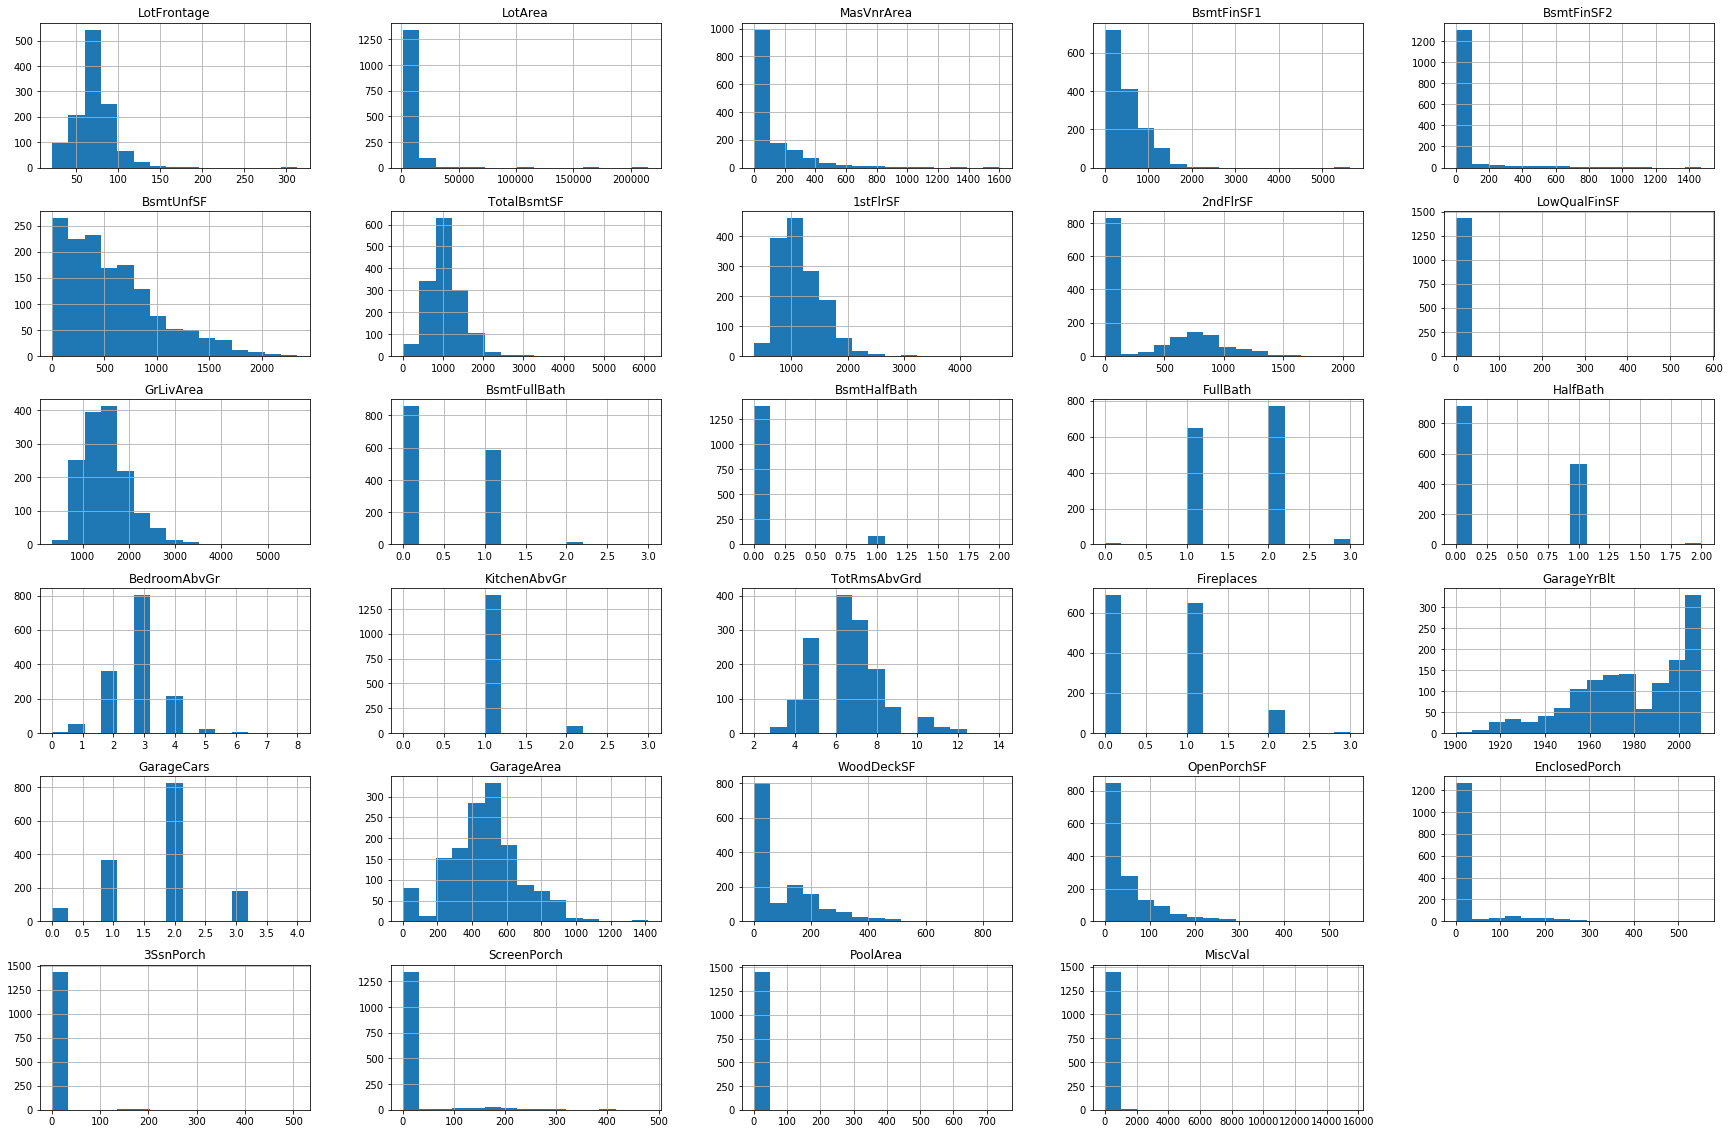

In [5]:
#1.1 Variables
#1.1.1 Numeric Variables
"""
LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, (6)
TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath,(6)
BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, (6)
Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, (5)
OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea, (5)
MiscVal(1)
"""
numerical = [
'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea', 'MiscVal'  
]
df[numerical].hist(bins=15, figsize=(30, 20), layout=(6, 5))

In [6]:
#column that only has "0"

zero_column = df[numerical].sum()
zero_column

LotFrontage         84130.0
LotArea          15354569.0
MasVnrArea         150551.0
BsmtFinSF1         647714.0
BsmtFinSF2          67962.0
BsmtUnfSF          828171.0
TotalBsmtSF       1543847.0
1stFlrSF          1697435.0
2ndFlrSF           506609.0
LowQualFinSF         8533.0
GrLivArea         2212577.0
BsmtFullBath          621.0
BsmtHalfBath           84.0
FullBath             2285.0
HalfBath              559.0
BedroomAbvGr         4185.0
KitchenAbvGr         1528.0
TotRmsAbvGrd         9516.0
Fireplaces            895.0
GarageYrBlt       2728360.0
GarageCars           2580.0
GarageArea         690551.0
WoodDeckSF         137597.0
OpenPorchSF         68124.0
EnclosedPorch       32053.0
3SsnPorch            4978.0
ScreenPorch         21989.0
PoolArea             4028.0
MiscVal             63494.0
dtype: float64

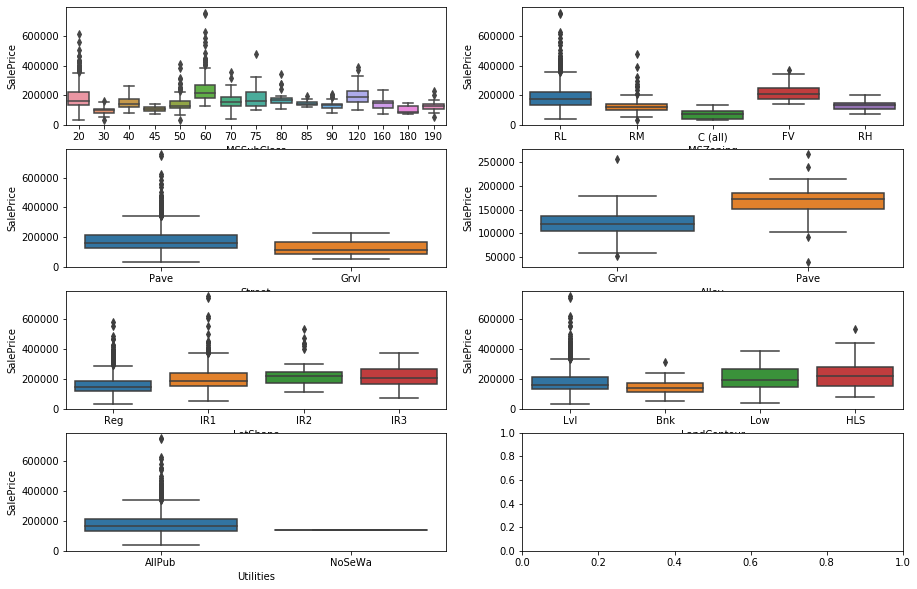

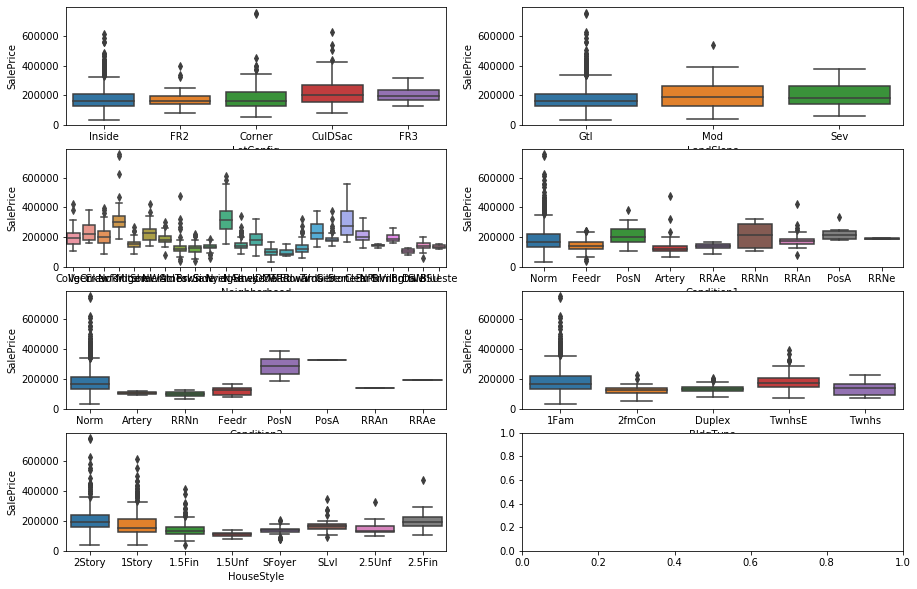

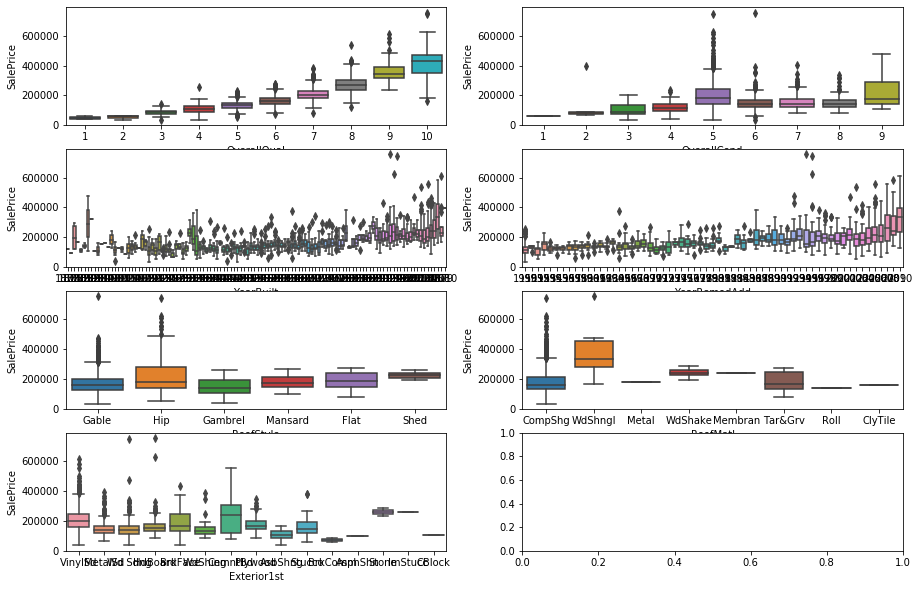

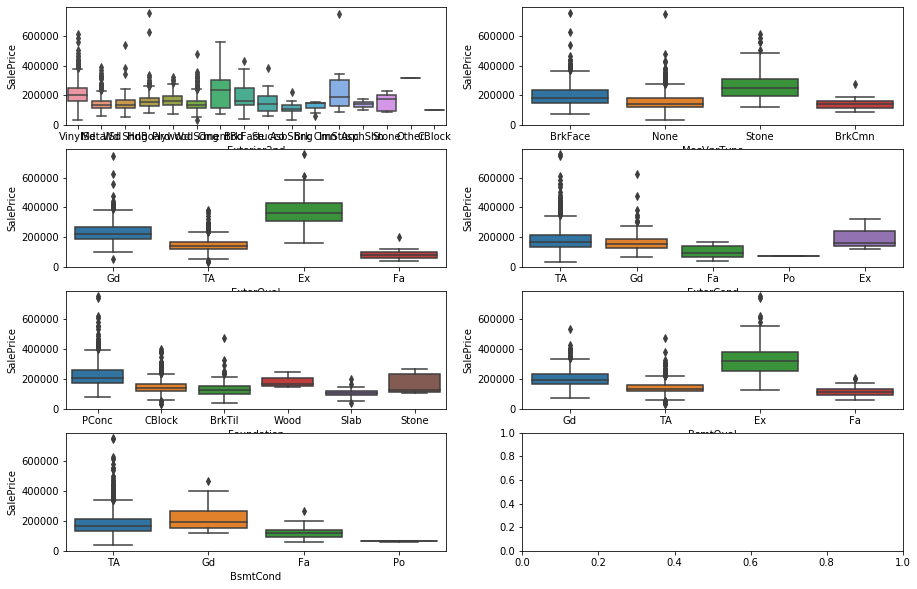

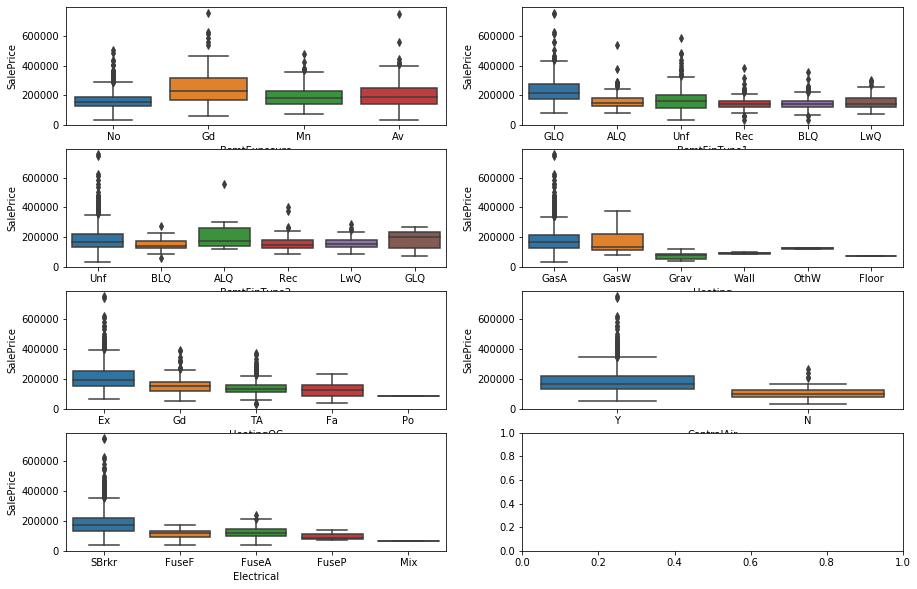

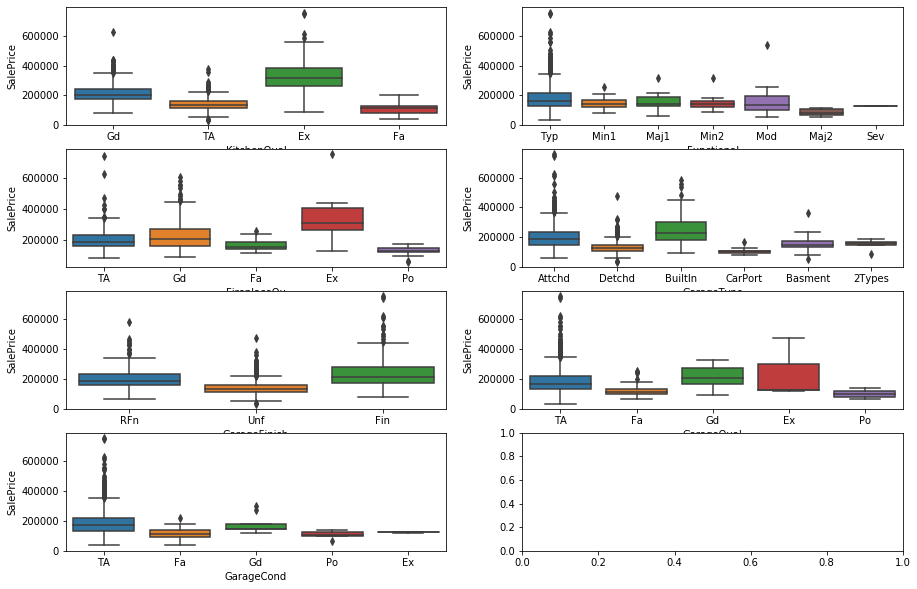

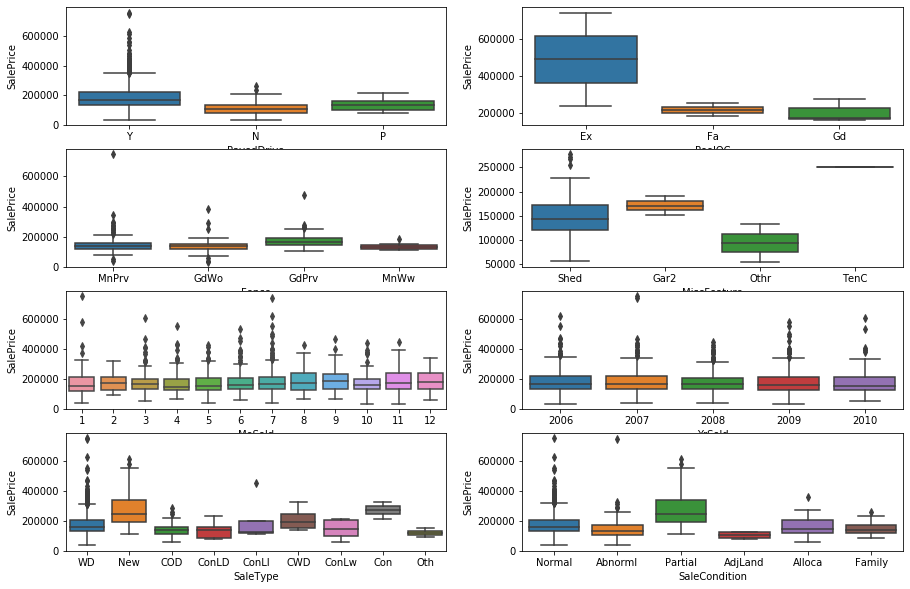

In [7]:
#1.1.2 Categorical Variables 
categorical1 = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities']
categorical2 = ['LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle']
categorical3 = ['OverallQual','OverallCond','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st']
categorical4 = ['Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond']
categorical5 = ['BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical']
categorical6 = ['KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']
categorical7 = ['PavedDrive','PoolQC','Fence','MiscFeature','MoSold','YrSold','SaleType','SaleCondition']

fig, ax = plt.subplots(4,2 , figsize=(15, 10))
for var, subplot in zip(categorical1, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=subplot)

fig, ax = plt.subplots(4,2 , figsize=(15, 10))
for var, subplot in zip(categorical2, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=subplot)
    
fig, ax = plt.subplots(4,2 , figsize=(15, 10))
for var, subplot in zip(categorical3, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=subplot)
    
fig, ax = plt.subplots(4,2 , figsize=(15, 10))
for var, subplot in zip(categorical4, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=subplot)
    
fig, ax = plt.subplots(4,2 , figsize=(15, 10))
for var, subplot in zip(categorical5, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=subplot)

fig, ax = plt.subplots(4,2 , figsize=(15, 10))
for var, subplot in zip(categorical6, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=subplot)
    
fig, ax = plt.subplots(4,2 , figsize=(15, 10))
for var, subplot in zip(categorical7, ax.flatten()):
    sns.boxplot(x=var, y='SalePrice', data=df, ax=subplot)

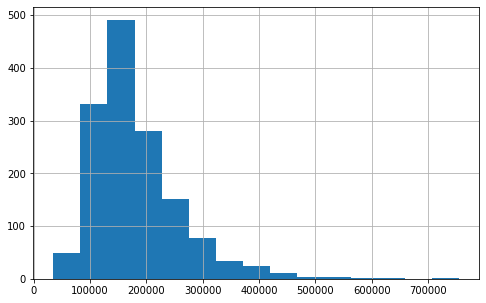

In [9]:
#1.2 target variable : SalePrice
df['SalePrice'].hist(bins=15, figsize=(8, 5))

## 2. Data Preprocessing

### 2.1 Fill nans

In [10]:
#fill nans with something else

#1.0 count nans
print("total nan count: ", df.isna().sum().sum())
print("nans in columns: ", df.isna().sum())

#1.0.0 if a variable has too many nans : delete that variable(column)
#1.0.1 fill nans with avg of each columns : numerical variables
df_numerical = df[numerical].fillna(df[numerical].mean())

#1.0.2 fill nans : categorical??  : fill with most frequent value??
categorical = categorical1 + categorical2 + categorical3 + categorical4 + categorical5 + categorical6 + categorical7 
df_categorical = df[categorical].apply(lambda x: x.fillna(x.value_counts().index[0]))

#1.0.3 y variale
y = df['SalePrice']

df=pd.concat([df_numerical, df_categorical,y], axis = 1)

print("total nan count: ", df.isna().sum().sum())
print("nans in columns: ",df.isna().sum())

total nan count:  6965
nans in columns:  MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64
total nan count:  0
nans in columns:  LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64


In [11]:
df

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id                                                                          
1            65.0     8450       196.0         706           0        150   
2            80.0     9600         0.0         978           0        284   
3            68.0    11250       162.0         486           0        434   
4            60.0     9550         0.0         216           0        540   
5            84.0    14260       350.0         655           0        490   
...           ...      ...         ...         ...         ...        ...   
1456         62.0     7917         0.0           0           0        953   
1457         85.0    13175       119.0         790         163        589   
1458         66.0     9042         0.0         275           0        877   
1459         68.0     9717         0.0          49        1029          0   
1460         75.0     9937         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  GarageCond  \
Id                                                   ...               
1             856       856       854             0  ...          TA   
2            1262      1262         0             0  ...          TA   
3             920       920       866             0  ...          TA   
4             756       961       756             0  ...          TA   
5            1145      1145      1053             0  ...          TA   
...           ...       ...       ...           ...  ...         ...   
1456          953       953       694             0  ...          TA   
1457         1542      2073         0             0  ...          TA   
1458         1152      1188      1152             0  ...          TA   
1459         1078      1078         0             0  ...          TA   
1460         1256      1256         0             0  ...          TA   

      PavedDrive  PoolQC  Fence  MiscFeature  MoSold  YrSold  SaleType  \
Id                                                                       
1              Y      Gd  MnPrv         Shed       2    2008        WD   
2              Y      Gd  MnPrv         Shed       5    2007        WD   
3              Y      Gd  MnPrv         Shed       9    2008        WD   
4              Y      Gd  MnPrv         Shed       2    2006        WD   
5              Y      Gd  MnPrv         Shed      12    2008        WD   
...          ...     ...    ...          ...     ...     ...       ...   
1456           Y      Gd  MnPrv         Shed       8    2007        WD   
1457           Y      Gd  MnPrv         Shed       2    2010        WD   
1458           Y      Gd  GdPrv         Shed       5    2010        WD   
1459           Y      Gd  MnPrv         Shed       4    2010        WD   
1460           Y      Gd  MnPrv         Shed       6    2008        WD   

      SaleCondition  SalePrice  
Id                              
1            Normal     208500  
2            Normal     181500  
3            Normal     223500  
4           Abnorml     140000  
5            Normal     250000  
...             ...        ...  
1456         Normal     175000  
1457         Normal     210000  
1458         Normal     266500  
1459         Normal     142125  
1460         Normal     147500  

[1460 rows x 80 columns]

### 2.2 Drop numerical variables with multicollinearity

In [12]:
#2.1 multicollinearity checking

#2.1.1 check multicollinearity among "numerical variables": If VIF >10 then that variable has multicollinearity
vif_data = pd.DataFrame()
vif_data["feature"] = df[numerical].columns
vif_data["VIF"] = [variance_inflation_factor(df[numerical].values, i) for i in range(len(df[numerical].columns))]

C:\Users\KIM\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [13]:
vif_data

feature        VIF
0     LotFrontage  15.617399
1         LotArea   2.587356
2      MasVnrArea   1.799190
3      BsmtFinSF1        inf
4      BsmtFinSF2        inf
5       BsmtUnfSF        inf
6     TotalBsmtSF        inf
7        1stFlrSF        inf
8        2ndFlrSF        inf
9    LowQualFinSF        inf
10      GrLivArea        inf
11   BsmtFullBath   3.564222
12   BsmtHalfBath   1.197847
13       FullBath  19.458272
14       HalfBath   2.997632
15   BedroomAbvGr  28.416082
16   KitchenAbvGr  29.411489
17   TotRmsAbvGrd  81.424035
18     Fireplaces   2.888910
19    GarageYrBlt  47.722183
20     GarageCars  34.621898
21     GarageArea  30.642974
22     WoodDeckSF   1.877392
23    OpenPorchSF   1.800334
24  EnclosedPorch   1.272064
25      3SsnPorch   1.033408
26    ScreenPorch   1.169930
27       PoolArea   1.096759
28        MiscVal   1.024630

In [14]:
#IF VIF >10 then that variable is known to have multicollinearity with other variables
df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','TotRmsAbvGrd'], axis=1, inplace=True)


In [15]:
df

LotFrontage  LotArea  MasVnrArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                             
1            65.0     8450       196.0             1             0         2   
2            80.0     9600         0.0             0             1         2   
3            68.0    11250       162.0             1             0         2   
4            60.0     9550         0.0             1             0         1   
5            84.0    14260       350.0             1             0         2   
...           ...      ...         ...           ...           ...       ...   
1456         62.0     7917         0.0             0             0         2   
1457         85.0    13175       119.0             1             0         2   
1458         66.0     9042         0.0             0             0         2   
1459         68.0     9717         0.0             1             0         1   
1460         75.0     9937         0.0             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  ...  GarageCond  \
Id                                                      ...               
1            1             3             1           0  ...          TA   
2            0             3             1           1  ...          TA   
3            1             3             1           1  ...          TA   
4            0             3             1           1  ...          TA   
5            1             4             1           1  ...          TA   
...        ...           ...           ...         ...  ...         ...   
1456         1             3             1           1  ...          TA   
1457         0             3             1           2  ...          TA   
1458         0             4             1           2  ...          TA   
1459         0             2             1           0  ...          TA   
1460         1             3             1           0  ...          TA   

      PavedDrive  PoolQC  Fence  MiscFeature  MoSold  YrSold  SaleType  \
Id                                                                       
1              Y      Gd  MnPrv         Shed       2    2008        WD   
2              Y      Gd  MnPrv         Shed       5    2007        WD   
3              Y      Gd  MnPrv         Shed       9    2008        WD   
4              Y      Gd  MnPrv         Shed       2    2006        WD   
5              Y      Gd  MnPrv         Shed      12    2008        WD   
...          ...     ...    ...          ...     ...     ...       ...   
1456           Y      Gd  MnPrv         Shed       8    2007        WD   
1457           Y      Gd  MnPrv         Shed       2    2010        WD   
1458           Y      Gd  GdPrv         Shed       5    2010        WD   
1459           Y      Gd  MnPrv         Shed       4    2010        WD   
1460           Y      Gd  MnPrv         Shed       6    2008        WD   

      SaleCondition  SalePrice  
Id                              
1            Normal     208500  
2            Normal     181500  
3            Normal     223500  
4           Abnorml     140000  
5            Normal     250000  
...             ...        ...  
1456         Normal     175000  
1457         Normal     210000  
1458         Normal     266500  
1459         Normal     142125  
1460         Normal     147500  

[1460 rows x 71 columns]

### 2.3 Drop categorical variables with multicollinearity, by PCA after one-hot-encoding categorical variables

In [16]:
fin_y = df['SalePrice']

In [17]:
#2.3 One hot encoding only categorcal variables 
fin_x = df.loc[:, df.columns!='SalePrice']
fin_x_one_hot = pd.get_dummies(fin_x)
fin_x_one_hot.head(5)

LotFrontage  LotArea  MasVnrArea  BsmtFullBath  BsmtHalfBath  FullBath  \
Id                                                                           
1          65.0     8450       196.0             1             0         2   
2          80.0     9600         0.0             0             1         2   
3          68.0    11250       162.0             1             0         2   
4          60.0     9550         0.0             1             0         1   
5          84.0    14260       350.0             1             0         2   

    HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  ...  SaleType_ConLw  \
Id                                                    ...                   
1          1             3             1           0  ...               0   
2          0             3             1           1  ...               0   
3          1             3             1           1  ...               0   
4          0             3             1           1  ...               0   
5          1             4             1           1  ...               0   

    SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
Id                                                                   
1              0             0            1                      0   
2              0             0            1                      0   
3              0             0            1                      0   
4              0             0            1                      1   
5              0             0            1                      0   

    SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                      
1                       0                     0                     0   
2                       0                     0                     0   
3                       0                     0                     0   
4                       0                     0                     0   
5                       0                     0                     0   

    SaleCondition_Normal  SaleCondition_Partial  
Id                                               
1                      1                      0  
2                      1                      0  
3                      1                      0  
4                      0                      0  
5                      1                      0  

[5 rows x 279 columns]

In [18]:
#standardization(both numerical and categorical varaibles)
scaler = StandardScaler()
fin_x_stand=scaler.fit_transform(fin_x_one_hot)
print(fin_x_stand.shape)

(1460, 279)


In [19]:
#PCA (both numerical and categorical) #131개로 85% 설명, 151개로 90%설명

# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp in range(3, fin_x_stand.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(fin_x_stand)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(fin_x_stand)
cluster_df=Final_PCA.transform(fin_x_stand) #final dataframe after PCA
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 131 components, we can explain 0.8504905129815726% of the variability in the original data.


In [20]:
cluster_df.shape

(1460, 131)

In [21]:
#to dataframe
fin_x = pd.DataFrame(cluster_df)

### 2.3 Remove outliers

In [22]:
#since we don't have a lot of data here, I won't remove any outliers...Maybe for better performances, I will....

### 2.4 Divide data to train/valid/test data

In [23]:
#concat fin_x and fin_y)
fin_df=pd.concat([fin_x, fin_y], axis = 1)

In [24]:
train_df, validate_df, test_df = np.split(fin_df.sample(frac=1), [int(.4*len(fin_df)), int(.7*len(fin_df))])

In [25]:
train_df

0         1         2         3         4         5         6  \
1320  1.848604 -4.066261 -0.027167  1.654556 -1.596239 -0.219456  0.316095   
309  -6.464090  0.121125  3.424288  1.383345 -1.453800  0.434944 -0.566364   
751  -3.479064  2.253071 -1.256313 -3.318174 -0.780026 -0.837351  1.232485   
1422 -3.894058  2.471481 -3.184897  0.892515  2.610650 -2.002142  0.255965   
867   1.754506 -1.718710 -0.730321  0.262206 -1.531188 -1.149268  2.314404   
...        ...       ...       ...       ...       ...       ...       ...   
704  -4.661512  0.639714 -1.406257 -0.497498 -0.545557 -2.912151  1.445229   
510   2.443506 -4.563067  1.402458  1.130627 -0.456752  0.327434 -0.782610   
1257  3.598513  0.712288 -0.446503 -0.295386 -1.884812 -1.823127 -0.275341   
532   2.577726 -0.142444 -1.076895  0.336057 -0.731826 -1.941778  1.910293   
676   9.349732  8.465874  6.817668 -2.804081  0.542873  3.668212  4.363106   

             7         8         9  ...       122       123       124  \
1320  0.023938  0.189747 -0.282273  ...  0.058099 -0.259488  0.667925   
309  -0.739324  0.578719  2.022136  ...  0.938911 -0.171392 -0.251452   
751   1.145197 -0.803659 -0.728762  ... -0.330501 -0.465258  0.649816   
1422 -0.704022  2.423512  2.099561  ...  0.322870 -0.372124  0.118197   
867   1.414364  0.096641  0.291313  ...  0.104375  0.634254  0.780303   
...        ...       ...       ...  ...       ...       ...       ...   
704   0.107580  1.172127  1.046550  ...  0.649289 -0.218130 -0.060713   
510   1.628426  0.953320  0.176060  ...  0.831986  1.395367 -2.657604   
1257  1.100484  0.951111  0.577582  ... -0.685779  1.382168  0.092182   
532   0.500701  0.494599 -1.358917  ... -1.991046  1.244107  0.665385   
676  -6.659886  1.302933 -0.902192  ... -1.100479  1.247859  2.073852   

           125       126       127       128       129       130  SalePrice  
1320  0.008952 -0.038146  0.507983  0.352036 -1.507556  0.190584   111000.0  
309   0.940274  0.785401  0.583321  0.226217 -0.250147  0.639014    82500.0  
751  -1.201147  0.686879 -1.498306  0.273065  0.057768 -0.877124    96500.0  
1422 -0.571605 -0.443687 -0.144770  0.243440 -0.384350 -0.578949   127500.0  
867   0.047784 -0.430769  0.070652  0.974944  0.383676 -1.383187   248900.0  
...        ...       ...       ...       ...       ...       ...        ...  
704  -0.220868 -1.087713 -1.339558 -0.390723 -0.888748  0.087296   140000.0  
510   0.638451 -0.269614  0.585963  2.474561 -0.104986  0.806993   124500.0  
1257  0.232143 -1.553589 -1.035287 -0.837404  0.267741  0.080008   301500.0  
532   0.909369  0.052820 -1.176005  1.387738  1.238806  0.606789   128000.0  
676  -1.772762  1.438705  1.319859  0.669150  2.588434 -1.186357   148500.0  

[584 rows x 132 columns]

In [26]:
train_df = train_df.dropna(axis=0)
train_x = train_df.drop('SalePrice', axis=1)
train_y = train_df["SalePrice"]

validate_df = validate_df.dropna(axis=0)
valid_x = validate_df.drop('SalePrice', axis=1)
valid_y=validate_df["SalePrice"]

test_df = test_df.dropna(axis=0)
test_x = test_df.drop('SalePrice', axis=1)
test_y = test_df["SalePrice"]


# 3.1 model1 - random forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score # 정확도 함수

clf = RandomForestRegressor(n_estimators=20, max_depth=5,random_state=0)
clf.fit(train_x,train_y)

predict1 = clf.predict(test_x)




In [28]:
#predict1.shape #(439,)
predict1

array([170804.15801211, 199305.89852374, 187396.5044018 , 188111.05005443,
       304083.82153772, 166958.33019854, 170482.30885596, 173770.7329315 ,
       153582.7403209 , 228331.33183422, 184249.35380908, 192599.60909106,
       194387.09815769, 164077.01442039, 196425.95753373, 183215.54906983,
       190623.53404909, 168145.2129837 , 164671.43442381, 173001.71390418,
       191359.83521411, 163257.76125947, 319683.80273779, 164875.63403212,
       165236.11471602, 190472.72971538, 190108.08689043, 179788.54681382,
       173064.02231888, 181657.18240534, 170873.5461995 , 172493.15247218,
       218871.41653098, 170846.11678739, 186155.93657377, 181977.47621627,
       181294.39722656, 163264.79041743, 174577.80485473, 180615.9108095 ,
       168186.80761463, 254638.4043283 , 167861.71311936, 196693.3853321 ,
       164102.81785863, 226603.10111305, 181795.28709431, 162481.71098472,
       176740.72222044, 166348.21242801, 194268.65737652, 167875.89419411,
       222501.49909251, 2

In [29]:
test_y

723     124500.0
1445    179600.0
1447    157900.0
54      385000.0
1186    104900.0
          ...   
69       80000.0
1182    392500.0
1412    140000.0
312     132000.0
1450     92000.0
Name: SalePrice, Length: 439, dtype: float64

In [30]:
test_x

0         1         2         3         4          5          6    \
723   2.964688  1.108189 -1.526426  0.106318 -1.042796  -0.612592  -1.032391   
1445  2.735676 -1.591089 -1.468329  1.071727  0.432595  -1.166412  -0.803060   
1447 -5.013797  0.493032 -1.197866 -2.794624 -0.234594  -0.239627   1.083601   
54    4.136926 -2.873939  0.595933  0.507417  2.241932  -0.854528  -2.331029   
1186  6.723059  1.712578  5.890442 -1.582244  4.679489   4.702633  -1.451959   
...        ...       ...       ...       ...       ...        ...        ...   
69    2.172387 -0.808487  2.477093 -1.556855 -0.000057   0.542408   1.863973   
1182 -6.409263 -2.428261  7.275868 -3.654681 -3.311630  11.733556   0.314062   
1412  6.733677  3.457037  1.266721  2.745734  2.062651   0.352802  11.022980   
312   4.952066  1.422160 -1.451887  0.550482  2.051023   2.498262  -3.053314   
1450  1.621479  0.129355 -3.111755 -0.526160  1.554192   0.909834   3.317888   

           7         8         9    ...       121       122       123  \
723   1.350073 -1.213383 -0.725471  ...  0.254233  0.004565  0.166516   
1445  0.772676  1.314567  0.632887  ...  0.884464 -1.727236 -0.055649   
1447 -0.860849 -0.511962  0.387550  ... -0.583836 -0.769786  0.890560   
54    0.376094 -3.234142 -0.455991  ...  0.162953 -0.789771  0.236854   
1186 -0.309356 -0.251688  5.220498  ...  0.222234 -1.853359  0.033253   
...        ...       ...       ...  ...       ...       ...       ...   
69   -2.316841 -0.667263 -1.703224  ... -1.252408  0.645252  0.178384   
1182  1.212766  4.795634 -7.882574  ...  0.166486  0.592590 -0.657239   
1412 -3.396504 -3.744251 -3.583932  ...  0.597551 -1.127908 -1.421101   
312   1.050818 -0.896263  1.200291  ...  1.465287 -0.389000 -1.401231   
1450 -0.116084 -2.044209 -0.761061  ...  0.172002  0.967188  0.243369   

           124       125       126       127       128       129       130  
723  -0.192522  0.230416 -0.312816 -0.793391  0.295259 -0.816092 -0.227311  
1445  0.800140 -0.018565 -0.294392  1.178796 -1.332034 -0.768121 -0.123243  
1447 -0.117715  0.012387 -0.821743  0.472884  0.034400 -0.179110  0.043905  
54   -0.045141  1.328041  1.117209 -0.023157 -0.171450  0.845562  0.614847  
1186 -0.361165 -1.636066 -0.768555  2.416819  0.819171 -0.792724  1.797923  
...        ...       ...       ...       ...       ...       ...       ...  
69   -2.211365 -0.783801  0.160720  1.588978 -0.956403  0.773979  0.956843  
1182  0.346196  0.694975 -0.667955  0.060696  1.738588 -1.676723  0.975703  
1412 -0.401232  1.240268 -1.021330  0.972074  0.034435 -0.147382 -0.074097  
312   0.186633 -0.178377  0.620381 -1.325567  0.570278  0.470974  0.453561  
1450  0.678146  0.880746 -0.424442  1.744801 -0.563968  0.833185  0.814238  

[439 rows x 131 columns]

In [31]:
#MSE
print(mean_squared_error(test_y, predict1)**0.5) #rmse

81553.2328192636


# 3.2 model2 - GBM

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gb_clf = GradientBoostingRegressor(random_state = 0)
gb_clf.fit(train_x, train_y) 
이때, predict _ 
gb_pred = gb_clf.predict(test_x)
print(mean_squared_error(test_y, gb_pred)**0.5) #rmse

86231.12024571189


In [30]:
gb_pred

array([180090.65878652, 180194.62118792, 178373.95764372, 174822.92370776,
       138934.49610489, 156865.55954029, 164799.28854393, 216436.88077777,
       161360.16703368, 188634.53687392, 145561.51441596, 193454.10876369,
       162049.4291099 , 160753.10472021, 185361.06183909, 191406.52071744,
       188461.05617389, 197192.09394978, 149926.54875668, 158640.26829547,
       134398.96691226, 153139.37832544, 154482.60219034, 152701.34162143,
       181026.85056599, 181849.69480777, 194203.14568695, 156994.75917599,
       214544.44594557, 331492.16154611, 189529.18202521, 165373.42754726,
       165559.63547916, 186053.04872021, 214893.7881934 , 209859.16368319,
       167310.88657884, 207763.27877076, 201263.59606257, 142392.74571533,
       211908.4787579 , 183238.28355833, 214708.87689714, 179359.30084616,
       169189.48363774, 153269.76395589, 151519.13997429, 179178.99701203,
       171922.60865982, 188594.26989367, 180074.96931598, 208650.17634869,
       204081.2762824 , 1

In [31]:
test_y

703     361919.0
668     193500.0
770     538000.0
528     446261.0
241     262500.0
          ...   
587     130000.0
73      185000.0
775     395000.0
1336    167900.0
1164    108959.0
Name: SalePrice, Length: 437, dtype: float64

# 3.3 model2 - xgboost

In [33]:
#!pip install xgboost
import xgboost



In [232]:
xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb_model.fit(train_x,train_y)
xgb_pred = xgb_model.predict(test_x)


In [242]:
print(mean_squared_error(test_y, xgb_pred)**0.5) #rmse

86369.76066563524


# 3.3 model3 - light gbm
##### LightGBM is fast and accurate model, but sometimes occurs overfitting problems when data size is small.

In [34]:
from lightgbm import LGBMRegressor

lgb_clf = LGBMRegressor(num_leaves=31, objective='binary')
lgb_clf.fit(train_x, train_y)
lgbm_pred = lgb_clf.predict(test_x)

In [35]:
print(mean_squared_error(test_y, lgbm_pred)**0.5) #rmse

195432.12411843642


# 3.4 model 4 - ANN(3-layers)

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultOutRegressor(nn.Module):
    def __init__(self, input_dim, target_dim, hidden_dim=32,seed=1234):
        super().__init__()
        torch.manual_seed(seed)
        self.hidden_dim = hidden_dim
        self.target_dim = target_dim

        self.fc1 = nn.Linear(input_dim, self.hidden_dim)
        self.fc2 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.fc3 = nn.Linear(self.hidden_dim, self.target_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

In [26]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
class TabularDataSet(Dataset) :
    def __init__(self, X , Y) :
        self._X = np.float32(X)
        self._Y = Y

    def __len__(self,) :
        return len(self._Y)

    def __getitem__(self,idx) :
        return self._X[idx], self._Y[idx]

In [27]:
from torch import optim
from IPython import display

#convert dataframe to array for DataLoader 
numpy_x = train_x.to_numpy()
numpy_y = train_y.to_numpy()

tabulardataset = TabularDataSet(numpy_x,numpy_y) 
train_dl = DataLoader(tabulardataset) 
model = MultOutRegressor(131 , 1)
optimizer = optim.AdamW(model.parameters(), lr=0.001) #default lr = 0.01
criterion = nn.MSELoss()


In [33]:
def update(input , target , model, criterion , optimizer,max_norm=5) :
    optimizer.zero_grad()
    output = model(input)
    print('output : ',output)
    loss = criterion(output , target.float())
    print('loss: ', loss)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm)
    optimizer.step()
    return loss 

def one_epoch(dataloader , model, criterion , optimizer ) :
    result = torch.FloatTensor([0])
    print('epoch_result',result)
    for idx , (input , target) in enumerate(dataloader) :
        loss = update(input , target , model, criterion , optimizer)
        result = torch.add(result , loss)
    else :
        result /= idx+1
        return result.detach().cpu().numpy()

def visualize(result) :
    display.clear_output(wait=True)
    plt.plot(result)
    plt.show()

def train(n_epochs , dataloader , model, criterion , optimizer , log_interval=10) :
    epoch_loss = []
    for epoch in range(n_epochs) :
        loss = one_epoch(dataloader , model, criterion , optimizer )
        print('train_loss:',loss)
        if epoch > 0 :
            epoch_loss.append(loss)
        if epoch % log_interval == 0 :
            visualize(epoch_loss)
    else :
        return np.min(epoch_loss)

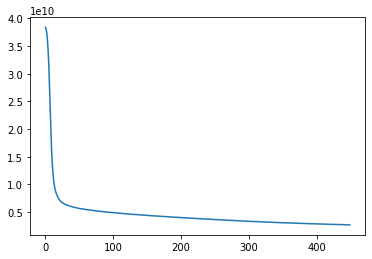

epoch_result tensor([0.])
output :  tensor([[157958.9688]], grad_fn=<AddmmBackward>)
loss:  tensor(292714.8125, grad_fn=<MseLossBackward>)
output :  tensor([[118984.3359]], grad_fn=<AddmmBackward>)
loss:  tensor(9094230., grad_fn=<MseLossBackward>)
output :  tensor([[195134.0625]], grad_fn=<AddmmBackward>)
loss:  tensor(870605.6250, grad_fn=<MseLossBackward>)
output :  tensor([[175495.2031]], grad_fn=<AddmmBackward>)
loss:  tensor(2264413.7500, grad_fn=<MseLossBackward>)
output :  tensor([[155584.6250]], grad_fn=<AddmmBackward>)
loss:  tensor(5.0245e+08, grad_fn=<MseLossBackward>)
output :  tensor([[127889.6797]], grad_fn=<AddmmBackward>)
loss:  tensor(12170.5713, grad_fn=<MseLossBackward>)
output :  tensor([[141483.0156]], grad_fn=<AddmmBackward>)
loss:  tensor(233304.0938, grad_fn=<MseLossBackward>)
output :  tensor([[119956.7031]], grad_fn=<AddmmBackward>)
loss:  tensor(915280.8750, grad_fn=<MseLossBackward>)
output :  tensor([[71885.3281]], grad_fn=<AddmmBackward>)
loss:  tensor(1.

C:\Users\KIM\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([[162634.8906]], grad_fn=<AddmmBackward>)
loss:  tensor(37636884., grad_fn=<MseLossBackward>)
output :  tensor([[276178.3438]], grad_fn=<AddmmBackward>)
loss:  tensor(1388494., grad_fn=<MseLossBackward>)
output :  tensor([[196752.7031]], grad_fn=<AddmmBackward>)
loss:  tensor(61155.7461, grad_fn=<MseLossBackward>)
output :  tensor([[135613.4531]], grad_fn=<AddmmBackward>)
loss:  tensor(7.6666e+10, grad_fn=<MseLossBackward>)
output :  tensor([[195629.5781]], grad_fn=<AddmmBackward>)
loss:  tensor(3064523.7500, grad_fn=<MseLossBackward>)
output :  tensor([[177352.0781]], grad_fn=<AddmmBackward>)
loss:  tensor(2.2608e+09, grad_fn=<MseLossBackward>)
output :  tensor([[153406.1719]], grad_fn=<AddmmBackward>)
loss:  tensor(5789663., grad_fn=<MseLossBackward>)
output :  tensor([[167822.2031]], grad_fn=<AddmmBackward>)
loss:  tensor(4742799., grad_fn=<MseLossBackward>)
output :  tensor([[85430.1250]], grad_fn=<AddmmBackward>)
loss:  tensor(907.5156, grad_fn=<MseLossBackward>)
output :  

2532927200.0

In [113]:
#train the model
train(500, train_dl ,model, criterion , optimizer,log_interval=50) #default n_epochs = 500 : min_loss = 2532927200.0

In [132]:
#test the model
ann_pred1 = model(torch.tensor(test_x.values).float())
print(mean_squared_error(test_y, ann_pred1.detach().numpy())**0.5) #rmse

99176.32901765831


# 3.5 model 5 - ANN(5-layers)

In [136]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultOutRegressor2(nn.Module):
    def __init__(self, input_dim, target_dim, hidden_dim=32,seed=1234):
        super().__init__()
        torch.manual_seed(seed)
        self.hidden_dim = hidden_dim
        self.target_dim = target_dim

        self.fc1 = nn.Linear(input_dim, self.hidden_dim)
        self.fc2 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.fc3 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.fc4 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.fc5 = nn.Linear(self.hidden_dim, self.target_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        x = F.relu(x)
        x = self.fc5(x)
        return x

In [137]:
from torch import optim
from IPython import display

#convert dataframe to array for DataLoader 
numpy_x = train_x.to_numpy()
numpy_y = train_y.to_numpy()

tabulardataset = TabularDataSet(numpy_x,numpy_y) 
train_dl = DataLoader(tabulardataset) 
model2 = MultOutRegressor2(131 , 1)
optimizer = optim.AdamW(model2.parameters(), lr=0.001) #default lr = 0.01
criterion = nn.MSELoss()

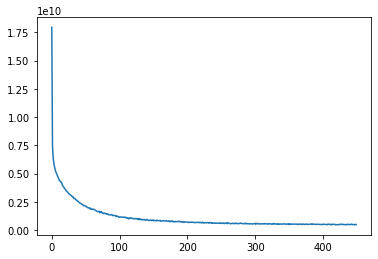

epoch_result tensor([0.])


C:\Users\KIM\anaconda3\lib\site-packages\torch\nn\modules\loss.py:528: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


train_loss: [4.9113827e+08]
epoch_result tensor([0.])
train_loss: [5.0928346e+08]
epoch_result tensor([0.])
train_loss: [4.8858035e+08]
epoch_result tensor([0.])
train_loss: [5.054563e+08]
epoch_result tensor([0.])
train_loss: [4.642146e+08]
epoch_result tensor([0.])
train_loss: [4.9271334e+08]
epoch_result tensor([0.])
train_loss: [4.5723866e+08]
epoch_result tensor([0.])
train_loss: [4.9392486e+08]
epoch_result tensor([0.])
train_loss: [4.8612915e+08]
epoch_result tensor([0.])
train_loss: [4.97068e+08]
epoch_result tensor([0.])
train_loss: [4.78047e+08]
epoch_result tensor([0.])
train_loss: [4.8552918e+08]
epoch_result tensor([0.])
train_loss: [4.7697274e+08]
epoch_result tensor([0.])
train_loss: [5.0382544e+08]
epoch_result tensor([0.])
train_loss: [4.780008e+08]
epoch_result tensor([0.])
train_loss: [4.8170496e+08]
epoch_result tensor([0.])
train_loss: [4.9221597e+08]
epoch_result tensor([0.])
train_loss: [4.7680704e+08]
epoch_result tensor([0.])
train_loss: [5.0511542e+08]
epoch_r

444426100.0

In [138]:
#train the model
train(500, train_dl ,model2, criterion , optimizer,log_interval=50) #default n_epochs = 500 : min_loss = 481092860

In [139]:
#test the model
ann_pred2 = model2(torch.tensor(test_x.values).float())
print(mean_squared_error(test_y, ann_pred2.detach().numpy())**0.5) #rmse

147314.16941653125


# cf) Tuning model's hyperparameters with K-fold cross validation

In [36]:
#training data for k-fold cross validation 
train_x_kf = pd.concat([train_x, valid_x], axis = 0)
train_y_kf = pd.concat([train_y, valid_y], axis = 0)

 ## Random Forest - K-fold cross validation

In [39]:
from sklearn.model_selection import RandomizedSearchCV

#define rf_grid
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
#rf_criterion = ['mse', 'mae']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               #'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

# Create the model to be tuned
rf_base = RandomForestRegressor()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid, 
                               n_iter = 200, cv = 3, verbose = 2, random_state = 42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x_kf, train_y_kf)

# View the best parameters from the random search
rf_random.best_params_

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 327.5min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 369.1min finished


{'n_estimators': 2000,
 'min_samples_split': 8,
 'min_impurity_decrease': 0.1,
 'max_features': 'log2',
 'max_depth': 5,
 'bootstrap': False}

In [40]:
#now try with random forest with "best" parameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score # 정확도 함수

clf_cv = RandomForestRegressor(n_estimators=200, max_depth=5,random_state=0,min_samples_split=8,min_impurity_decrease=0.1,max_features='log2',bootstrap=True)

clf_cv.fit(train_x,train_y)

predict1 = clf_cv.predict(test_x)


In [41]:
#MSE
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(test_y, predict1)**0.5) #rmse

74292.61483889371


# 4. Ensemble with linear model at the end
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/ (ensemble idea in this link is based on the k-fold cross validation to all base models)

#### - Each model's predict_y becomes the column of new train _X for linear model.
#### - Train_y(actual y values) becomes new train _Y for linear model
#### - Since we used 5 regression models, the final linear regression ensemble model has train _X of 5 columns and train_y of 1 column 

In [ ]:
new_train_x = pd.concat([rf_pred_y, gbm_pred_y, xgboost_pred_y, ligbm_pred_y, ann_3_pred_y, ann_5_pred_y], axis=1)
new_train_y = train_y

new_test_x = test_x
new_test_y = test_y

ensemble_model = LogisticRegressor()

#train ensemble model with new_train_x and new_train_y
#test ensembel model with new_test_x and new_test_y